Projek Bengkel Koding : Hungarian Dataset

Nama                  : Nicholaus Verdhy Putranto

Nim                   : A11.2020.12447

Kelas                 : BKDS07

# Data Collection

Data set pada projek ini diambil dari https://archive.ics.uci.edu/dataset/45/heart+disease

# Load Dataset

In [1]:
#Import library 
import pandas as pd
import numpy as np
import re
import itertools

In [2]:
#load dataset
dir = "hungarian.data"

In [3]:
#melakukan encoding pada dataset
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
    
#membuatnya kedalam data frame
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10)))

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [4]:
# Melihat informasti tipe data yang ada serta jumlah data yang ada setiap vaiabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Sesuai dengan arahan pada sumber dataset, terdapat kolom nama 75 berisikan nilai name. Name mewakili ahkir dari setiap baris data, dan nilai -9.0 mewakili missing value. Maka dari itu kita perlu menghapus kolom 75 dan mengubah tipe data object menjadi float agar kita dapat mengubah -9.0 menjadi Nan

In [5]:
#Menghapus kolom 75 berisikan name
df.drop(75,axis=1,inplace=True)

#menhapus kolom 0 karena itu index data
df.drop(0,axis=1,inplace=True)

In [6]:
#mengubah tipe data kolom object menjadi float
df = df.astype(float)

In [7]:
#melihat informasi tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# Validasi Data

Seperti yang tertera pada sumber data set, -9.0 mewakili missing value. kita gunakan .replace untuk mengganti nilai

In [8]:
df.replace(-9.0,np.nan, inplace=True)

In [9]:
#melihat missing value
df.isna().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [10]:
df.isna().sum().sum()

8511

Pada data set ini tertera nilai missing value sebanyak 8511 data

In [11]:
#sekarang mari kita lihat 5 data teratas pada data set. kita gunakan pd.set_option untuk melihat full kolom
pd.set_option("Display.max_column",None)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,289.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.0,18.0,NaN,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,NaN,26.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,20.0,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,180.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,9.0,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.0,14.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,20.0,84.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,283.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.0,10.0,NaN,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,NaN,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,26.0,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,214.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.0,19.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,30.0,84.0,3.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.0,2.0,NaN,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,NaN,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,84.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


# Menentukan Fitur

Sesuai dengan sumber penjjelasan datasetnya, fitur yang dugunakan ada pada kolom yang ada pada lokasi [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]. Maka dari itu kita melakukan pengambilan kolom tersebut

In [12]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0


Setelah itu, kita mengganti kolom  nama sesuai dengan arahan dari sumber data set. kita gunakan .rename untuk menggantinya. Sebelumnya kita membuat dictionary yang nantinya kita gunakan untuk mengganti nama kolom

Agar tidak menghilangkan data awal / mentah. Mari kita copy dataframenya kedalam df_selected_copy. Hal ini untuk mengantisipasi agar data asli tidak terkontaminasi dengan data yang telah di prosesing

In [13]:
df_selected_copy = df_selected.copy()

In [14]:
#buat dictionary nama
nama_kolom = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [15]:
#mengubah nama kolom .rename
df_selected_copy.rename(columns=nama_kolom,inplace=True)

In [16]:
df_selected_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


# Data Cleansing

Memasuki tahap berikutnya yaitu data cleansing. Data cleansing ini akan berguna untuk menghilangkan missing values pada dataset

In [17]:
# melihat missing value pada kolom
df_selected_copy.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [18]:
#jumlah data
df_selected_copy.shape

(294, 14)

In [19]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kita bisa lihat pada missing value, pada kolom slope,ca, dan thal memiliki banyak nilai yang hilang hampir 90%, maka kita hapus kolom tersebut terlebih dahulu

In [20]:
df_selected_copy.drop(["slope","ca","thal"],axis=1, inplace=True)

In [21]:
df_selected_copy.isna().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Setelah itu mari kita isi nilai missing value tersebut dengan nilai mean

In [22]:
df_selected_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,0.792517
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,1.237006
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Nilai mean dari kolom yang memiliki missing value sudah bertipe float. Kita bisa langsung mengisi nilai hilang dengan fillna dan .mean

In [23]:
df_selected_copy.fillna(df_selected_copy.mean(),inplace=True)
df_selected_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [24]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


Setelah itu saya melakukan pengecekan pada duplikasi data dengan .duplicate

In [25]:
df_selected_copy.duplicated().sum()

1

Terdapat 1 data duplikat, mari kita lihat dalam dataset

In [26]:
df_duplikat = df_selected_copy.duplicated()
df_selected_copy[df_selected_copy.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,250.848708,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,250.848708,0.0,0.0,160.0,0.0,0.0,0.0


setelah kita mgengetahui ada duplikasi data, mari kita hapus duplikat datanya

In [27]:
df_selected_copy.drop_duplicates(inplace=True)

In [28]:
df_selected_copy.duplicated().sum()

0

In [29]:
df_selected_copy.to_csv("Hungarian_Data.csv",index=False,encoding="utf-8")

In [30]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


# Melihat korelasi antar data

In [31]:
df_selected_copy.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246569,0.087089,0.180640,0.052181,-0.460513,0.239453,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082197,0.027695,0.040557,-0.107704,-0.106990,0.151360,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081376,0.134711,0.032071,-0.019721,-0.367838,0.492735,0.351735,0.427536
trestbps,0.246569,0.082197,0.081376,1.000000,0.080726,0.093736,0.011801,-0.181824,0.211709,0.203874,0.214950
chol,0.087089,0.027695,0.134711,0.080726,1.000000,0.114044,0.049250,-0.122013,0.163207,0.106790,0.256062
fbs,0.180640,0.040557,0.032071,0.093736,0.114044,1.000000,0.048124,-0.070381,0.114193,0.061466,0.151135
restecg,0.052181,-0.107704,-0.019721,0.011801,0.049250,0.048124,1.000000,0.005907,0.044096,0.041160,0.045550
thalach,-0.460513,-0.106990,-0.367838,-0.181824,-0.122013,-0.070381,0.005907,1.000000,-0.400813,-0.300429,-0.367537
exang,0.239453,0.151360,0.492735,0.211709,0.163207,0.114193,0.044096,-0.400813,1.000000,0.628941,0.570686
oldpeak,0.178172,0.115959,0.351735,0.203874,0.106790,0.061466,0.041160,-0.300429,0.628941,1.000000,0.580732


Untuk visualisasi , menggunakan seabord dengan diimport dahulu

In [32]:
#import library
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

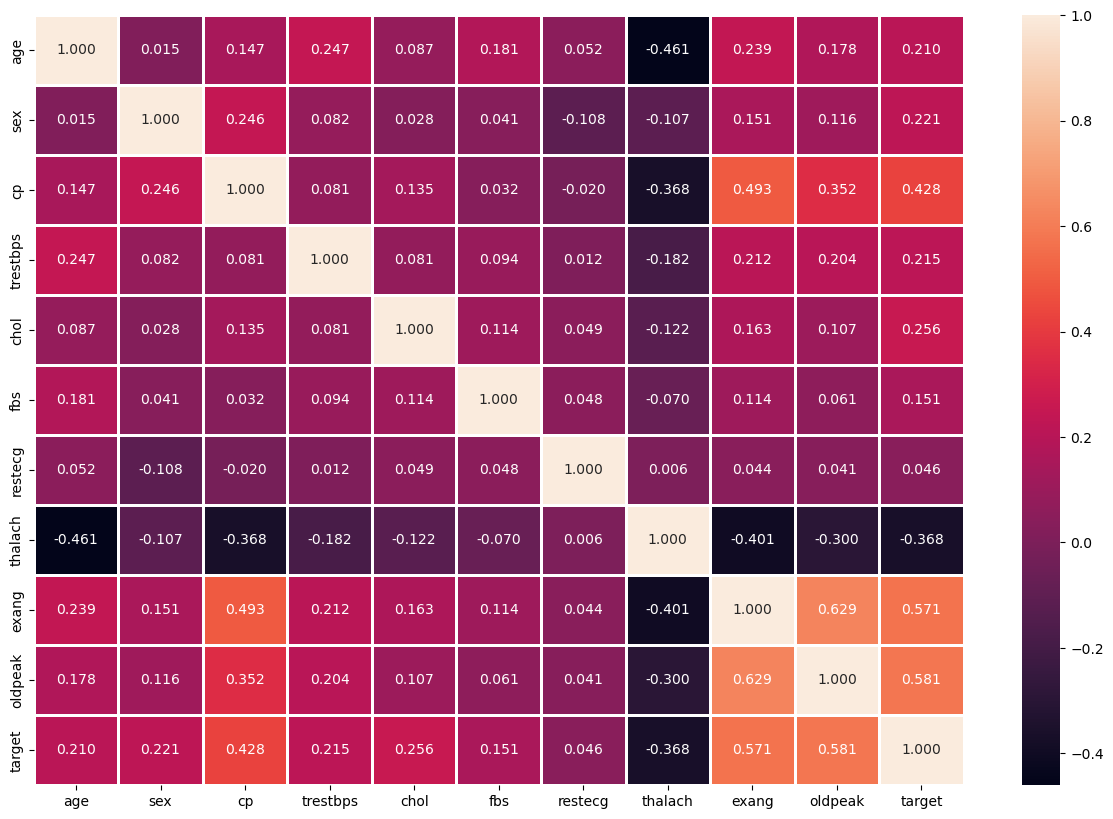

In [33]:
#mendapatkan nilai korelas
korelasi_matrix = df_selected_copy.corr()

#membuat plot
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(korelasi_matrix,annot=True,linewidths=1.0, fmt=".3f")

Dari korelasi diatas, variabel yang memiliki korelasi yang kuat dengan target diantaranya oldpeak, exang, dan cp. Sedangkan yang memiliki korelas sangat jauh atau kroelasi negatif adalah thalach

# Konstruksi Data

Mari kita melakukan pemisahan terhadap dataset kedalam variabel bebas (x) dan variabel terikat(y). Untuk tipe data sudah sesuai dengan kebutuhan yaitu float

In [34]:
df_selected_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [35]:
#memasukkan variebl bebas ke dalam x
X = df_selected_copy.drop("target",axis=1)
y = df_selected_copy["target"]

# Balancing Data

Karena ini klaisfikasi, mari kita lihat keseimbangan data dialam data ini

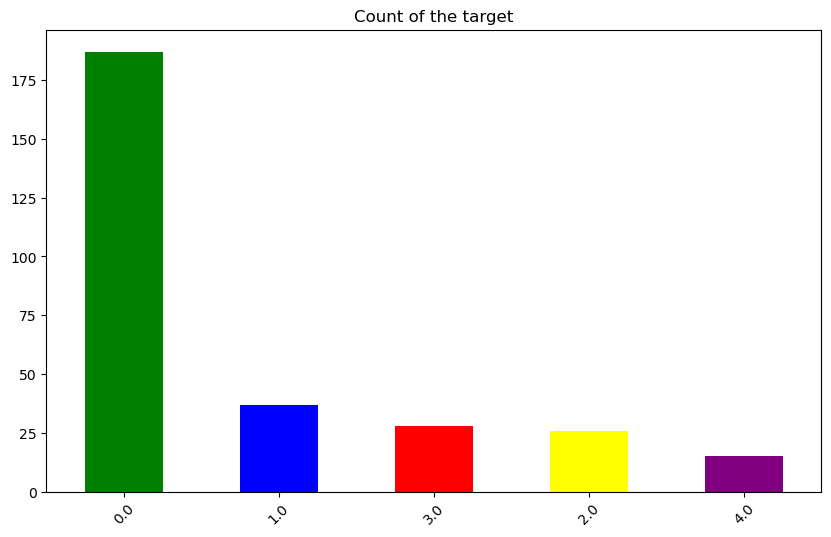

In [36]:
df_selected_copy["target"].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("Count of the target")
plt.xticks(rotation=45);

Pada data diatas menunjukkan bahwa mayoritas dari dataset ini berkelas 0.0 . Hal ini harus diambil tindakan karena jika kita tidak melakukan balancing data maka model akan lebih mendominasiui untuk memprediksi data kelas 0 dari pada kelas lainnya. Maka dari itu kta lakukan dengan over sampling menggunakan SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
#panggil smote
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

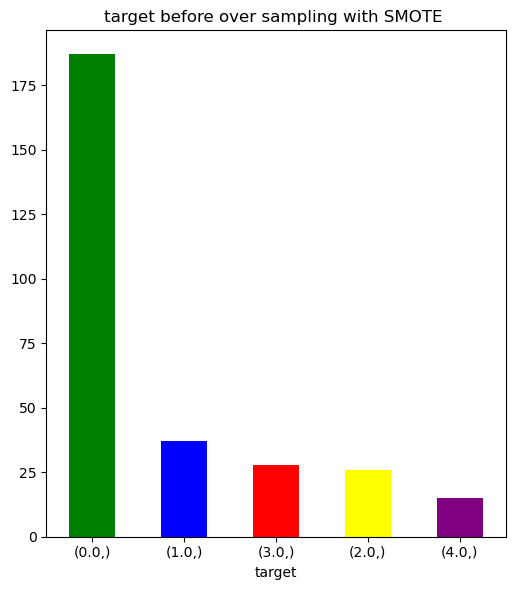

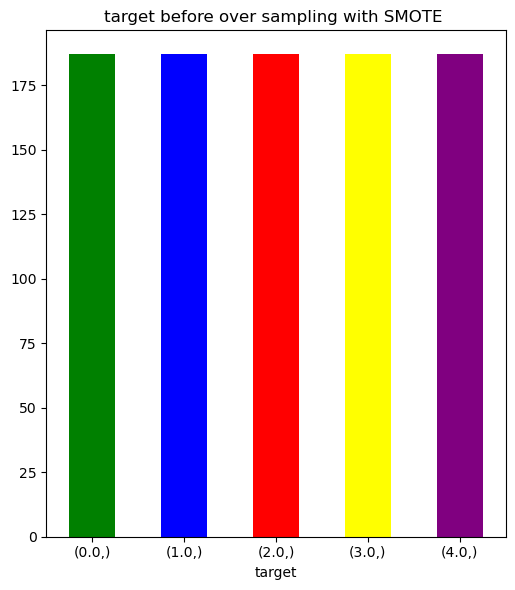

In [39]:
#visualisasi bingkai perbandingan no smote vs SMOTE
plt.figure(figsize=(12,8))

#mempersiapkan data visualisasi no smote dan smote
no_smote_y = pd.DataFrame(data=y)
smote_y = pd.DataFrame(data=y_smote_resampled)

#membuat visulasisi untu no smote
plt.subplot(1, 2, 1)
no_smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

#membuat visulisasi smote
plt.subplot(1,2,1)
smote_y.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue',"red","yellow","purple"])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()


In [40]:
#jumlah data kelas no smote
no_smote_y.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [41]:
#jumlah data kelas smote
smote_y.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

# Normalisai Data

mari kita lihat deskriptif satatistik yang ada pada data

In [42]:
df_selected_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.660695,250.848708,0.070169,0.219176,139.058463,0.304791,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576783,65.059056,0.252362,0.460690,23.558003,0.460320,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Melakukan normalisasi pakai MinMax Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403408,0.341008,0.095330,0.119233,0.453355,0.598723,0.227015
std,0.174873,0.332492,0.274211,0.147494,0.110993,0.251862,0.199179,0.197233,0.449966,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330121,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.206178,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
import json

# Hitung nilai minimum dan maksimum untuk setiap fitur
min_max_values = {feature: {"min": min(values), "max": max(values)} for feature, values in dfcek1.items()}

# Simpan nilai minimum dan maksimum dalam JSON
with open("min_max_values.json", "w") as json_file:
    json.dump(min_max_values, json_file, indent=2)

print("Nilai minimum dan maksimum telah disimpan dalam min_max_values.json")

Nilai minimum dan maksimum telah disimpan dalam min_max_values.json


In [45]:
X_smote_resampled_normal.size

9350

In [46]:
y_smote_resampled.size

935

# Spliting Data

In [47]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# MOdeling

In [48]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
    'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }
    
    return print(metric_dict)

 ## Oversampled

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

### K-NN

In [50]:
KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.749
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.39      0.48        38
         1.0       0.73      0.81      0.77        37
         2.0       0.79      0.84      0.82        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.74      0.75      0.74       187
weighted avg       0.74      0.75      0.74       187



In [52]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.749, 'recall': 0.749, 'F1 score': 0.737, 'Precision score': 0.738}


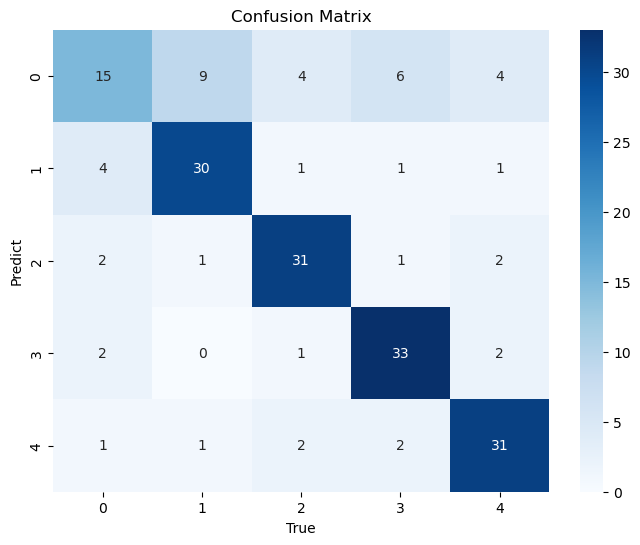

In [53]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [54]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [56]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.921}


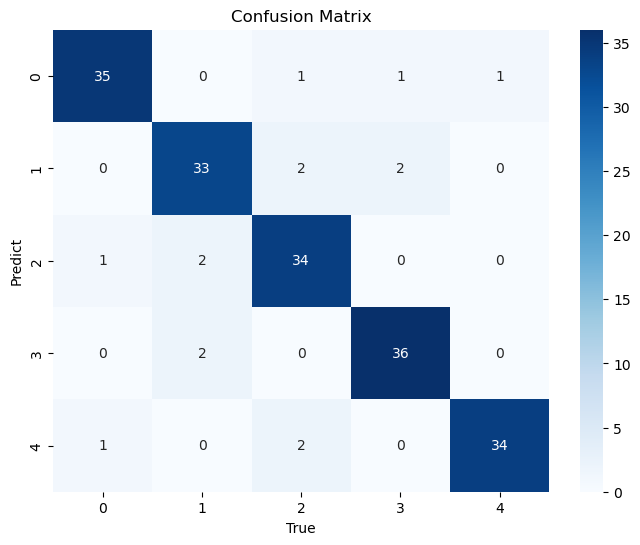

In [57]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBOOST

In [58]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.91      0.81      0.86        37
         2.0       0.82      0.89      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.94      0.89      0.92        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [60]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.893, 'Precision score': 0.895}


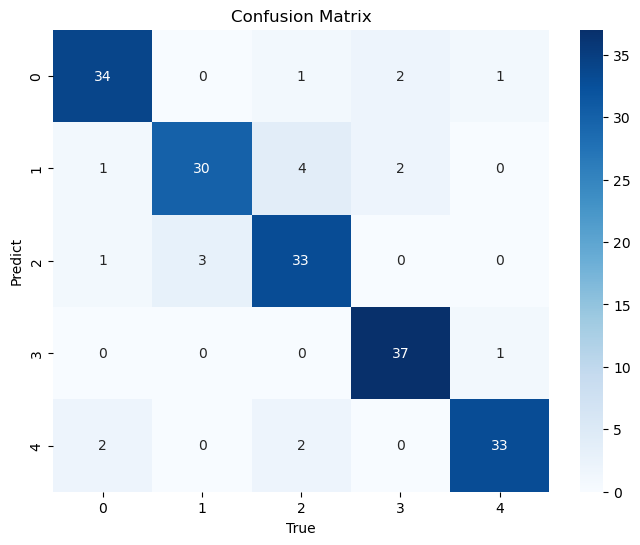

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversampled + Normalisasi

### K-NN

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.79      0.84      0.82        37
         2.0       0.87      0.92      0.89        37
         3.0       0.89      0.87      0.88        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [63]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.86, 'Precision score': 0.862}


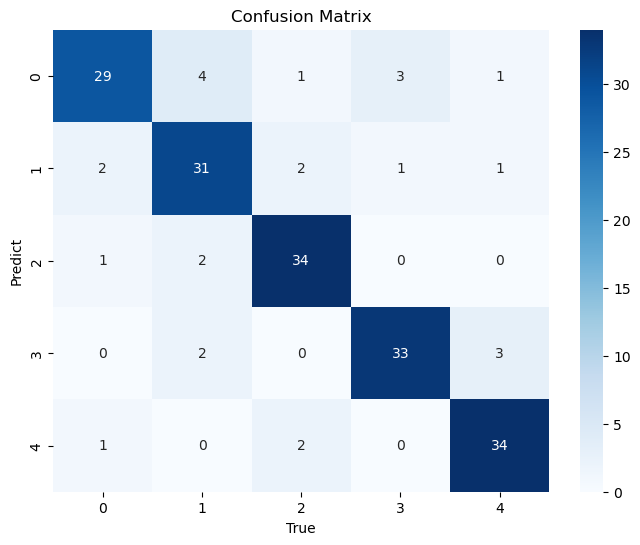

In [64]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Radom Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [67]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.921}


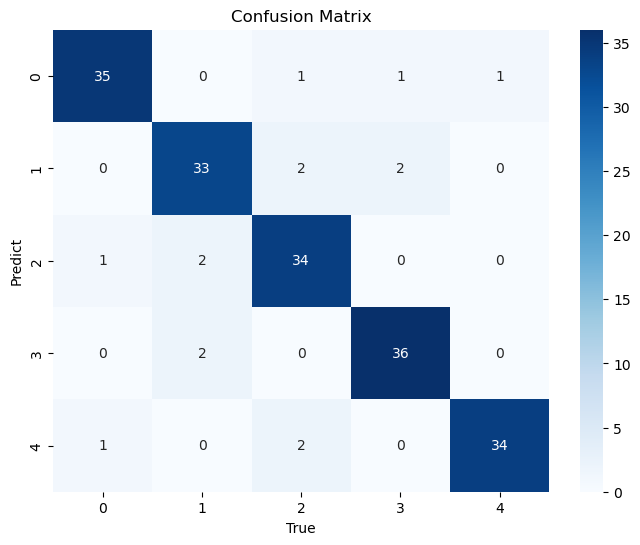

In [68]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [69]:
import pickle

# Assuming you have a trained model stored in the variable 'model'
# and you want to save it to a file named 'your_model.pkl'

with open('randomforest_Oversampled_normalisasi.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

### XgBoost

In [70]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.91      0.81      0.86        37
         2.0       0.82      0.89      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.94      0.89      0.92        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [72]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.893, 'Precision score': 0.895}


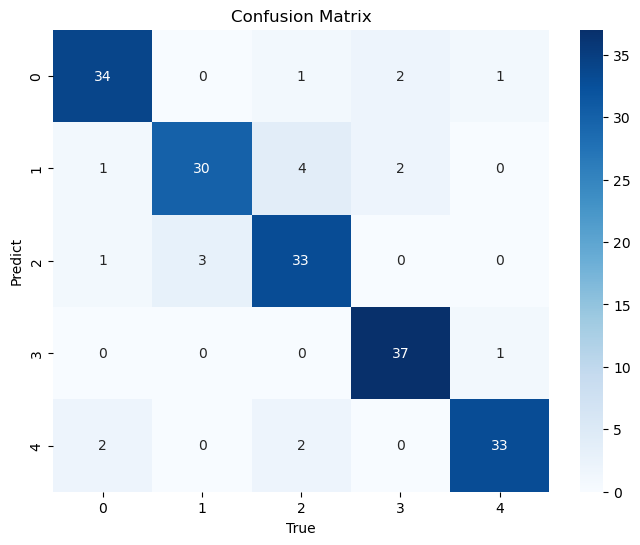

In [73]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Tuning Model

In [74]:
from sklearn.model_selection import RandomizedSearchCV

### K-NN

In [75]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 47, 'algorithm': 'auto'}


In [76]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun*100)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 93.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        38
         1.0       0.84      0.86      0.85        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [77]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.932}


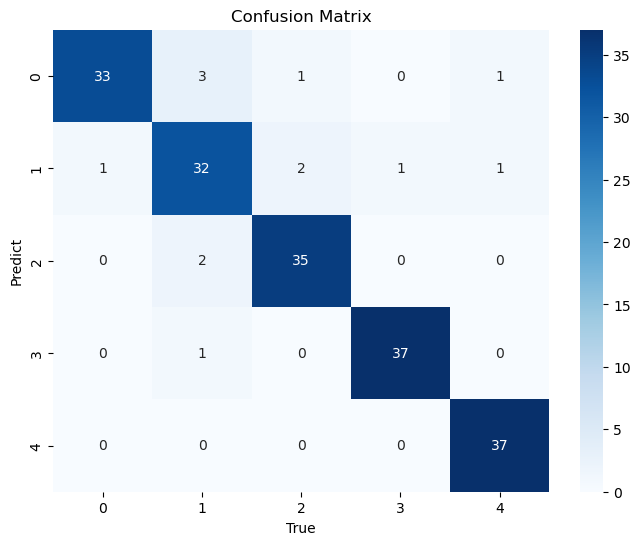

In [78]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [79]:
# import pickle

# # Assuming you have a trained model stored in the variable 'model'
# # and you want to save it to a file named 'your_model.pkl'

# with open('knnmodel.pkl', 'wb') as model_file:
#     pickle.dump(knn_model, model_file)

### Random Forest

In [80]:
rf_model = RandomForestClassifier()
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1,random_state=42)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [81]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.84      0.86      0.85        37
         3.0       0.90      0.97      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [82]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.905}


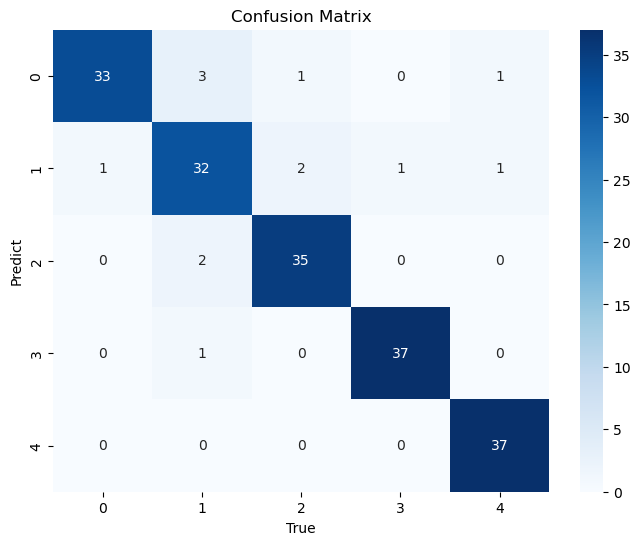

In [83]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XgBoost

In [84]:
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [85]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.89      0.86      0.88        37
         3.0       0.95      0.97      0.96        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [86]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.909}


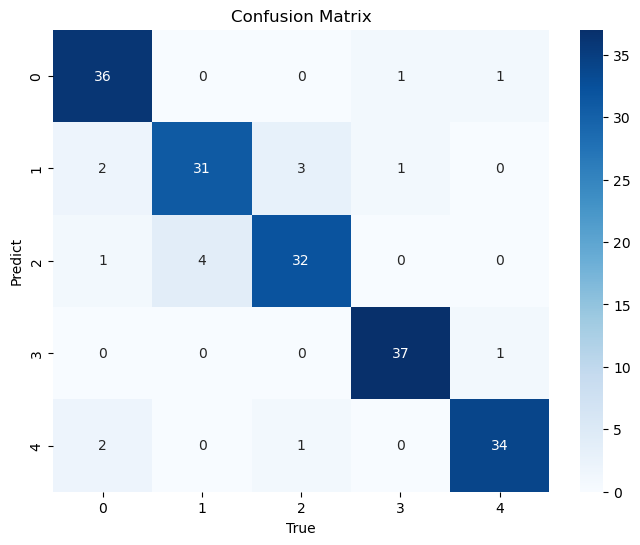

In [87]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [88]:
import pickle

# Assuming you have a trained model stored in the variable 'model'
# and you want to save it to a file named 'your_model.pkl'

with open('xgBoost_tuning.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Evaluasi

In [89]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote*100,
                                         accuracy_rf_smote*100,
                                         accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,74.9
1,Random Forest,92.0
2,XGBoost,89.3


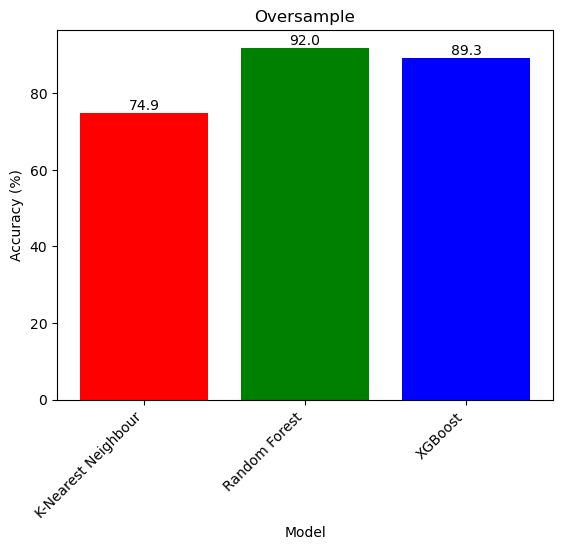

In [90]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [91]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal*100,
                                         accuracy_rf_smote_normal*100,
                                         accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,89.3


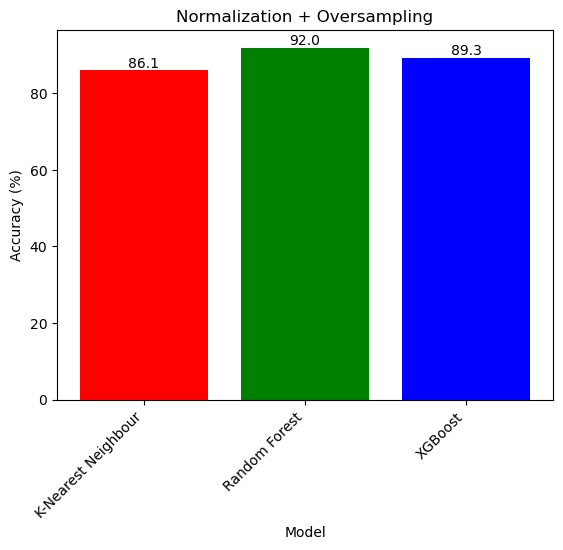

In [92]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [93]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                         accuracy_rf_smote_normal_Tun*100,
                                         accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,90.4
2,XGBoost,90.9


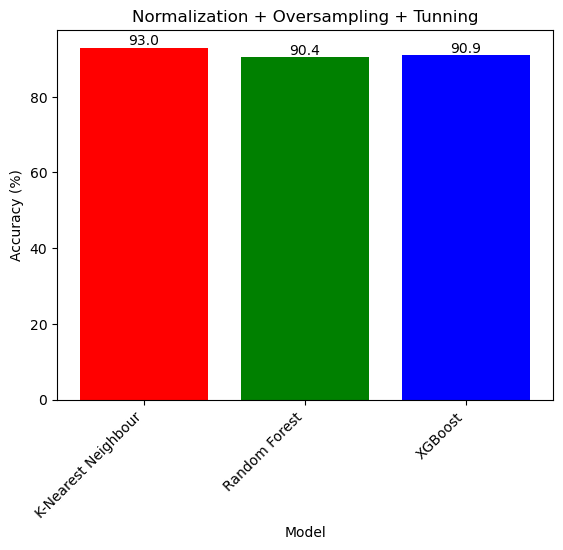

In [94]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

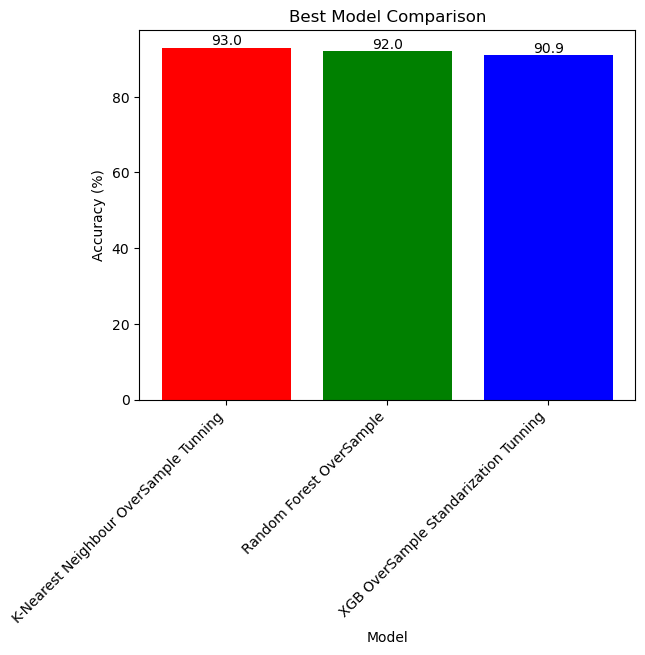

In [95]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# Kesimpulan


Dari hasil penelitian di atas, dapat disimpulkan bahwa penanganan ketidakseimbangan data yang optimal melibatkan penggunaan metode Random Oversampling SMOTE, tunning parameter dengan RandomSearchCV, dan normalisasi data memberikan dampak positif pada kinerja model klasifikasi. Oleh karena itu, model terbaik pada penelitian ini terdapat pada model KNN, yang mencapai tingkat akurasi tertinggi sebesar 93%. Sementara model Random Forest, meskipun awalnya memiliki akurasi tinggi, mengalami penurunan signifikan setelah proses tuning dan penanganan ketidakseimbangan data. Model XGBoots juga menunjukkan hasil yang baik dengan akurasi 92%. Maka dari itu, pemilihan model terbaik dapat menjadi keputusan kritis dalam mengoptimalkan performa keseluruhan dari suatu sistem klasifikasi, dan pada penelitian ini, model terbaik dapat diidentifikasi pada model KNN